<h1><center>Linear Regression with multiple variables</center></h1>
<h1><center>a.k.a.</center></h1>
<h1><center>Multivariate Regression</center></h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [4]:
df=pd.read_csv("D:\\Machine Learning\\multihomeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


## 1. Handling NaN values - Here I make Assumption of NaN bedroom value by taking the median of other bedrooms with integer value.

In [8]:
import math
median_bedrooms=math.floor(df.bedrooms.median())
median_bedrooms

3

## 2. Filling NaN values.

In [13]:
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


## 3. Multivariate Regression - Having more than one Independent variables.

In [15]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 4. Coefficients of Independent variables.

In [16]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

## 5. Intercept -

In [17]:
reg.intercept_

383724.9999999998

## 6. Prediction -

In [21]:
reg.predict([[3000,3,40]])

array([444400.])

## 7. Demonstration of how it works :
## -- Equation of Line Y=(m1* area)+(m2* bedrooms)+(m3* age)+c
### Where 
### i) Y - Dependent Vaariable.
### ii) area, bedroom and age - Independent Variable.
### iii) m1, m2 and m3 - Coefficients of independent variables.
### iv) c - Intercept.

In [23]:
m1= 137.25
m2= -26025.
m3= -6825.
c=383724.9999999998
area= 3000
bedroom= 3
age= 40
y=m1*area+m2*bedroom+m3*age+c
y

444399.9999999998

## 8. Graphical Representation of Multivariate Regression.

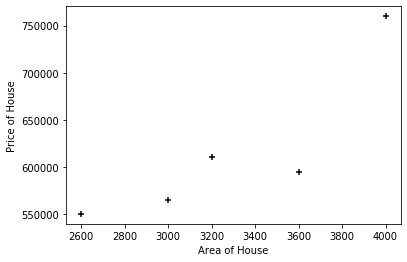

In [27]:
plt.xlabel("Area of House")
plt.ylabel("Price of House")
plt.scatter(df.area,df.price,color="black",marker="+")

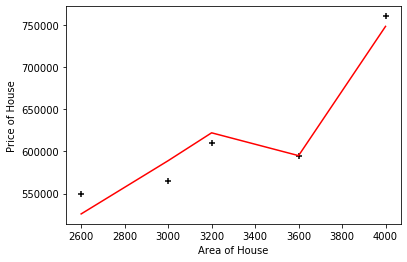

In [34]:
plt.xlabel("Area of House")
plt.ylabel("Price of House")
plt.scatter(df.area,df.price,color="black",marker="+")
plt.plot(df.area,reg.predict(df[["area","bedrooms","age"]]),color="red")
plt.show()